# RSI Predictive Model

In [1]:
pip install finta

Note: you may need to restart the kernel to use updated packages.


In [2]:
from finta import TA

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)

#newest yahoo API for Jerry
import yfinance as yahoo_finance

#optional for Jerry/Chuck
#yahoo_finance.pdr_override()

%matplotlib inline

In [4]:
# ___variables___
ticker = 'AAPL'

# start time to pull data
start_time = datetime.datetime(2021, 1, 1)

#end_time = datetime.datetime(2021, 7, 20)
end_time = datetime.datetime.now().date().isoformat() 

In [5]:
# If you have a list of your own you would like to use just create a new list instead of using this, for example: tickers = ["FB", "AMZN", ...] 
AAPL = pd.read_csv('AAPL.csv', usecols=[0,1,2,3,4,5,6], index_col='Date', parse_dates=True)
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200


In [6]:
# Prepare data to calculate the RSI by calculating the difference in price.
# if you dont put two pairs of square brackets, [[]], you will turn your data into a series. No bueno, kids.Keep as dataframe. 
delta = AAPL[['Close']].diff(1)
delta 

,Close
Date,
2021-01-04,NaN
2021-01-05,1.599991
2021-01-06,-4.409997
2021-01-07,4.320000
2021-01-08,1.130005
...,...
2021-07-26,0.430007
2021-07-27,-2.220001
2021-07-28,-1.790008


In [7]:
# Remove Nan Values if you do turn your data into a series, you can change it back with the pd.DataFrame. check it out:
# delta = pd.DataFrame(delta).dropna()
# delta

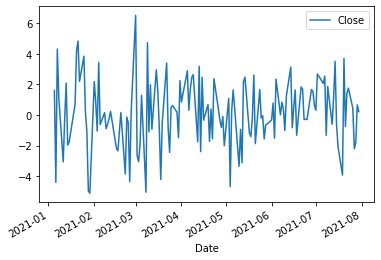

In [8]:
# Plot data
delta.plot();

In [10]:
delta['side'] = np.nan

previous_price = 0

# for index, row in delta.iterrows():
#for i, row in delta.iterrows():
#    if str(row['Close']) == "buy":
#        print(row["Close"], row["1"])

#    if previous_price == 0:
#        delta.loc[index, "side"] = "buy"
#    elif row["Close"] < previous_price:
#        delta.loc[index, "side"] = "buy"
#    elif row["Close"] > previous_price:
#        delta.loc[index, "side"] = "sell"
#    else:
#        delta.loc[index, "side"] = "hold"

#    previous_price = row["Close"]
    
#delta

In [11]:
# Get Positive Gains (up) and Negative gains (down) as buy and sell signals data preperation
up = delta.copy()
down = delta.copy()
up[up<0]= 0
down[down > 0] = 0

buy = []
sell = []

for index, row in delta.iterrows():

    if previous_price == 0:
        delta.loc[index, "side"] = "buy"
        buy.append(row["Close"])
        delta.loc[index, "per share profit/loss"] = 0
    elif row["Close"] < previous_price:
        delta.loc[index, "side"] = "buy"
        buy.append(row["Close"])
        delta.loc[index, "per share profit/loss"] = 0
    elif row["Close"] > previous_price:
        delta.loc[index, "side"] = "sell"
        sell.append(row["Close"])
        delta.loc[index, "per share profit/loss"] = sell[-1] - buy[-1]
    else:
        delta.loc[index, "side"] = "hold"

    previous_price = row["Close"]


In [12]:
# get the time period you want to contabulate TEAM decided 5 days 
# BUT every signal cant be at 5 days it will severly overfitt your model so we can change that number in the following equality:
period = 14

#Calculate the average gain and the average loss
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())

In [13]:
# Formula to Calculate the RSI 
# STEP 1 calculate the RS
rs = avg_gain / avg_loss

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + rs))

In [14]:
RSI.head()

,Close,side
Date,,
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,NaN,NaN


In [15]:
RSI.tail()

,Close,side
Date,,
2021-07-26,63.533982,NaN
2021-07-27,54.327296,NaN
2021-07-28,53.361651,NaN
2021-07-29,51.074175,NaN
2021-07-30,52.800660,NaN


# Other Technical Indicators (TI) of Oscillation
<p> Like RSI the team was flexible on dates. To facilitate testing for others models, the TI 
    have been coded to permit changes easily.</p>

In [18]:
# Time variable for Dataframe. 
# ohlc = resample(df, "24h")

# Import Data
data_file = ("DATA/AAPL.csv")
ohlc = pd.read_csv('AAPL.csv', usecols=[0,1,2,3,4,5,6], index_col='Date', parse_dates=True)

In [19]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200
...,...,...,...,...,...,...
2021-07-26,148.270004,149.830002,147.699997,148.990005,148.990005,72269700
2021-07-27,149.119995,149.210007,145.550003,146.770004,146.770004,103580300
2021-07-28,144.809998,146.970001,142.539993,144.979996,144.979996,118931200


In [22]:
# We need to make all column labels lowercase for TA library
AAPL.columns = ['open', 'high','low','close','adj close','volume']
AAPL


,open,high,low,close,adj close,volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200
...,...,...,...,...,...,...
2021-07-26,148.270004,149.830002,147.699997,148.990005,148.990005,72269700
2021-07-27,149.119995,149.210007,145.550003,146.770004,146.770004,103580300
2021-07-28,144.809998,146.970001,142.539993,144.979996,144.979996,118931200


In [32]:
# CSV FILE BC JERRY is GOING TO ASK FOR IT....
AAPL_df = AAPL.to_csv('AAPLforTA.csv')

In [33]:
# CALCULATE USING OHLC 
ohlc = pd.read_csv('AAPLforTA.csv', index_col="", parse_dates=True)

ValueError: 'date' is not in list

In [ ]:
# Calculate SMA 42 is measured in hours
TA.SMA(ohlc, 42)

In [ ]:
# Volume 
TA.OBV(ohlc)

In [ ]:
# Bollinger Bands
TA.BBANDS(ohlc, TA.KAMA(ohlc, 20))